## Best Neighborhood in Pittsburgh

### Using police incident data to determine the safest neighborhood

In [479]:
# Importing pandas
import pandas as pd
import numpy as np

# To make 2D charts and graphs from data
%matplotlib inline
import matplotlib.pyplot as plt

In [480]:
# load in the police incident data file
policeData = pd.read_csv("police-incident-blotter.csv")
# drop lines with insufficient data
policeData.drop([994,1398,1405,1413,1414,1534,1552,1583,1600,1797,1873,2197,2204,2206,2348,2489,2496,2512,2522,2637,2639,2715,2725,2796,2801,2964,3081], axis=0)
policeData.head(10)

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,214368107,19220799,99,2019-10-29T13:40:00,"Cecil Pl & Penn Ave Pittsburgh, PA 15222",N,Central Business District,2,FOUND PROPERTY,9489 Found Property,201.0,6.0,6.0,-80.003100,40.442497
1,214376833,19220899,99,2019-10-29T16:12:00,"200 Block Mayflower St Pittsburgh, PA 15206",N,Larimer,5,MISCELLANEOUS FIRE OTHER INVEST CONTINUED,9123 Miscellaneous Fire Other Investigation to...,1208.0,NaN,NaN,0.000000,0.000000
2,214379292,19220863,26,2019-10-28T16:00:00,"2600 Block Centre Ave Pittsburgh, PA 15219",Y,Terrace Village,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(4) Harassment Communicates Prohibited ...,510.0,6.0,3.0,-79.968380,40.446506
3,214379407,19221009,6,2019-10-29T15:00:00,"900 Block Beech Ave Pittsburgh, PA 15233",N,Allegheny West,1,THEFT FROM AUTO,3934 Theft from Vehicle,2201.0,NaN,NaN,0.000000,0.000000
4,214379413,19211917,6,2019-10-17T12:25:00,"600 Block 1st Ave Pittsburgh, PA 15219",Y,Central Business District,2,RETAIL THEFT (SHOPLIFTING),3929 Retail Theft.,201.0,6.0,6.0,-79.996041,40.435040
5,214380175,19221016,99,2019-10-29T18:37:00,"3800 Block O Hara St Pittsburgh, PA 15213",Y,North Oakland,4,BENCH WARRANT ARREST - NO TIE,9501 Bench Warrant,403.0,NaN,NaN,0.000000,0.000000
6,-3280001155,19221042,99,2019-10-29T19:15:00,"100 Block Alluvian St Pittsburgh, PA 15207",N,Hazelwood,4,ACCIDENTAL FIRE,9018 Accidental Fire,1515.0,NaN,NaN,0.000000,0.000000
7,214386102,19221084,99,2019-10-29T20:30:00,"3400 Block Colby St Pittsburgh, PA 15214",N,Summer Hill,1,MISSING PERSONS (18+),9490 Missing Persons (18 and Over),2612.0,NaN,NaN,0.000000,0.000000
8,214189531,19218345,99,2019-10-26T08:48:00,"Moga St Pittsburgh, PA 15206",N,East Liberty,5,DEAD ON ARRIVAL (DOA),9496 Dead on Arrival (DOA),1113.0,9.0,2.0,-79.917510,40.467180
9,214093475,19217087,6,2019-10-24T14:30:00,"600 Block Melwood Ave Pittsburgh, PA 15213",N,North Oakland,4,THEFT FROM AUTO,3934 Theft from Vehicle,507.0,6.0,3.0,-79.954181,40.457576


In [481]:
#Counting number of police incidents for each neighborhood
neighborhoodCounts = pd.DataFrame(policeData['INCIDENTNEIGHBORHOOD'].value_counts())
neighborhoodCounts.rename(columns = {'INCIDENTNEIGHBORHOOD':'Aggregate Incidences'}, inplace = True)
neighborhoodCounts.head(10)

,Aggregate Incidences
Central Business District,244
South Side Flats,163
Carrick,132
Shadyside,92
East Liberty,89
Brookline,83
Mount Washington,73
Marshall-Shadeland,72
East Allegheny,65
Bluff,62


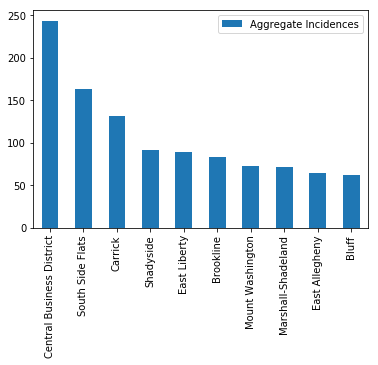

In [482]:
#plotting totals with bar graph
neighborhoodCounts.head(10).plot.bar()

In [483]:
#Looking at list in opposite order
neighborhoodCounts = pd.DataFrame(policeData['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=True))
neighborhoodCounts.rename(columns = {'INCIDENTNEIGHBORHOOD':'Incidences'}, inplace=True)
neighborhoodCounts.head(10)

,Incidences
Outside County,1
Arlington Heights,1
New Homestead,2
Regent Square,2
Swisshelm Park,2
Oakwood,3
East Carnegie,3
Ridgemont,3
Mount Oliver,3
Hays,4


In [484]:
#Deleting irrelevant data
neighborhoodCounts.drop(["Outside County"], inplace=True)
neighborhoodCounts.drop(["Outside State"], inplace=True)

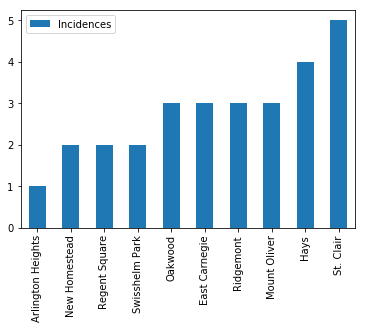

In [485]:
#plotting totals with bar graph
neighborhoodCounts.head(10).plot.bar()

In [486]:
# What are the most popular incidents?
offenseCounts = pd.DataFrame(policeData['INCIDENTHIERARCHYDESC'].value_counts().sort_values(ascending=False))
offenseCounts.head(15)

,INCIDENTHIERARCHYDESC
99,470
HIT AND RUN,317
THEFT,317
SIMPLE ASSAULT,178
CRIM MISCHIEF,147
THEFT FROM AUTO,118
BURGLARY,110
FOUND PROPERTY,86
HARRASSMENT,79
ROBBERY,78


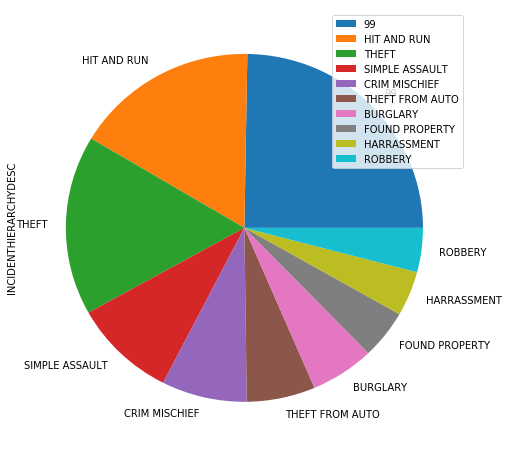

In [487]:
offenseCounts.head(10).plot.pie(y='INCIDENTHIERARCHYDESC', subplots=False, figsize=(8, 8));

In [488]:
#Looking into the types of offenses for neighborhoods
offensesDF = pd.DataFrame(index =[neighborhoodCounts.index.values], columns=["HIT AND RUN", "THEFT", "SIMPLE ASSAULT", "CRIM MISCHIEF", "THEFT FROM AUTO", "BURGLARY", "FOUND PROPERTY", "HARRASSMENT", "ROBBERY", "STOLEN PROPERTY"])
for row in range(len(offensesDF)):
    for column in range(len(offensesDF.columns)):
        offensesDF.iat[row,column] = 0

currNeighborhood = ""
offense = ""
for row in range(len(policeData)) :
    currNeighborhood = policeData.iat[row,6]
    offense = policeData.iat[row,8]
    if(currNeighborhood in offensesDF.index):
        if(offense=="HIT AND RUN"):
            offensesDF.loc[currNeighborhood, "HIT AND RUN"] += 1
        elif(offense=="THEFT"):
            offensesDF.loc[currNeighborhood, "THEFT"] += 1
        elif(offense=="SIMPLE ASSAULT"):
            offensesDF.loc[currNeighborhood, "SIMPLE ASSAULT"] += 1
        elif(offense=="CRIM MISCHIEF"):
            offensesDF.loc[currNeighborhood, "CRIM MISCHIEF"] += 1
        elif(offense=="THEFT FROM AUTO"):
            offensesDF.loc[currNeighborhood, "THEFT FROM AUTO"] += 1
        elif(offense=="BURGLARY"):
            offensesDF.loc[currNeighborhood, "BURGLARY"] += 1
        elif(offense=="FOUND PROPERTY"):
            offensesDF.loc[currNeighborhood, "FOUND PROPERTY"] += 1
        elif(offense=="HARRASSMENT"):
            offensesDF.loc[currNeighborhood, "HARRASSMENT"] += 1
        elif(offense=="ROBBERY"):
            offensesDF.loc[currNeighborhood, "ROBBERY"] += 1
        elif(offense=="STOLEN PROPERTY"):
            offensesDF.loc[currNeighborhood, "STOLEN PROPERTY"] += 1

# Most UNsafe neighborhoods
offensesDF.tail(10)


,HIT AND RUN,THEFT,SIMPLE ASSAULT,CRIM MISCHIEF,THEFT FROM AUTO,BURGLARY,FOUND PROPERTY,HARRASSMENT,ROBBERY,STOLEN PROPERTY
Knoxville,5,5,7,2,0,4,1,2,3,3
East Allegheny,6,3,0,2,0,5,4,1,0,3
Marshall-Shadeland,2,4,11,5,2,3,3,2,1,0
Mount Washington,10,4,2,4,9,3,1,2,2,2
Brookline,8,6,4,3,1,3,0,3,6,1
East Liberty,10,10,5,6,4,2,1,5,2,1
Shadyside,11,9,4,3,2,15,5,2,0,0
Carrick,14,11,11,10,8,7,0,4,2,1
South Side Flats,26,17,4,10,10,1,6,5,6,0
Central Business District,17,31,29,8,2,0,16,8,12,3


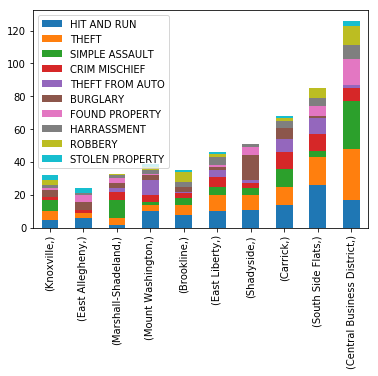

In [489]:
# Pie chart visualization of most UNsafe neighborhoods
offensesDF.tail(10).plot.bar(stacked=True)

In [490]:
# Most safe neighborhoods
offensesDF.head(10)

,HIT AND RUN,THEFT,SIMPLE ASSAULT,CRIM MISCHIEF,THEFT FROM AUTO,BURGLARY,FOUND PROPERTY,HARRASSMENT,ROBBERY,STOLEN PROPERTY
Arlington Heights,0,1,0,0,0,0,0,0,0,0
New Homestead,0,0,1,0,0,0,0,0,0,0
Regent Square,0,0,0,0,1,0,0,0,0,0
Swisshelm Park,0,0,0,0,1,0,0,0,1,0
Oakwood,0,1,1,0,0,0,0,0,0,0
East Carnegie,0,0,0,0,0,0,0,1,0,0
Ridgemont,0,0,0,0,0,0,0,0,0,1
Mount Oliver,1,2,0,0,0,0,0,0,0,0
Hays,1,0,0,0,0,0,0,0,0,0
St. Clair,0,0,0,1,0,0,0,0,0,0


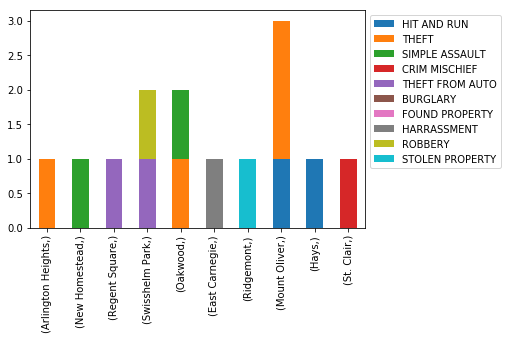

In [491]:
# Pie chart visualization of most UNsafe neighborhoods
offensesDF.head(10).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1,1))

## Great, but...

### Arlington Heights is possibly the smallest neighborhood in pgh, so it would make sense that few crimes occur there. Let's look into this some more...

In [492]:
# load in the neighborhood data file
neighborhoodData = pd.read_csv("Neighborhoods_.csv")

neighborhoodData.head()

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,shape_le_1,shape_ar_1,page_number,plannerassign,created_user,created_date,last_edited_user,last_edited_date,Shape__Area,Shape__Length
0,1,0.0,42.0,3.0,40500.0,1.0,4.200304e+11,Block Group 1,G5030,S,...,11526.863222,7.843108e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546
1,2,1.0,42.0,3.0,40400.0,1.0,4.200304e+11,Block Group 1,G5030,S,...,20941.386025,1.390463e+07,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570
2,3,2.0,42.0,3.0,40200.0,2.0,4.200304e+11,Block Group 2,G5030,S,...,18271.426385,5.999801e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515
3,4,3.0,42.0,3.0,30500.0,2.0,4.200303e+11,Block Group 2,G5030,S,...,15696.759230,7.202139e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337
4,5,5.0,42.0,3.0,20300.0,1.0,4.200302e+11,Block Group 1,G5030,S,...,23903.077852,1.694785e+07,15,Andrea Lavin Kossis,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672


In [493]:
# What does all this data mean???
# Let's boil it down to the neighborhoods and their population

# Delete irrelevant columns
neighborhoodData.drop(["objectid", "fid_blockg", "statefp10", "countyfp10", "tractce10", "blkgrpce10", "geoid10", "namelsad10", "mtfcc10", "funcstat10", "aland10", "awater10", "intptlat10", "intptlon10", "shape_leng", "fid_neighb", "area", "perimeter", "neighbor_", "neighbor_i", "hood_no", "sqmiles", "dpwdiv", "unique_id", "sectors", "shape_le_1", "shape_ar_1", "page_number", "plannerassign", "created_user", "created_date", "last_edited_user", "last_edited_date", "Shape__Area", "Shape__Length"], axis=1, inplace=True)
neighborhoodData.rename(columns={'hood':'Neighborhood', 'acres':'Acres'}, inplace=True)

In [494]:
#making dataframes compatable with one another...must make row names into column
neighborhoodCounts.index.name = 'Neighborhood'
neighborhoodCounts.reset_index(inplace=True)

In [520]:
# Now let's merge this with the neighborhood police incident totals
newDFmerge = pd.merge(neighborhoodData, neighborhoodCounts)
newDFmerge

,Neighborhood,Acres,Incidences
0,Central Oakland,180.883,53
1,North Oakland,320.679,34
2,West Oakland,138.372,22
3,Crawford-Roberts,166.101,30
4,Strip District,390.864,44
5,Central Business District,411.593,244
6,Spring Hill-City View,404.765,19
7,Perry South,581.656,49
8,Summer Hill,282.104,6
9,Northview Heights,201.558,27


In [521]:
# Now let's find the incidence per acre to better standardize our data
newDFmerge['Incidence per Acre'] = newDFmerge.apply(lambda row: row.Incidences/row.Acres, axis = 1)

In [522]:
newDFmerge

,Neighborhood,Acres,Incidences,Incidence per Acre
0,Central Oakland,180.883,53,0.293007
1,North Oakland,320.679,34,0.106025
2,West Oakland,138.372,22,0.158992
3,Crawford-Roberts,166.101,30,0.180613
4,Strip District,390.864,44,0.112571
5,Central Business District,411.593,244,0.592819
6,Spring Hill-City View,404.765,19,0.046941
7,Perry South,581.656,49,0.084242
8,Summer Hill,282.104,6,0.021269
9,Northview Heights,201.558,27,0.133956


In [498]:
newDFmerge.sort_values(by="Incidence per Acre", ascending=True, inplace=True)
newDFmerge.head(10)

,Neighborhood,Acres,Incidences,Incidence per Acre
66,Hays,1125.478,4,0.003554
77,New Homestead,510.728,2,0.003916
34,Swisshelm Park,308.575,2,0.006481
76,East Carnegie,277.895,3,0.010795
61,Arlington Heights,84.592,1,0.011821
82,Ridgemont,237.059,3,0.012655
81,Fairywood,622.746,9,0.014452
69,Lincoln Place,632.497,10,0.015810
65,Regent Square,123.682,2,0.016171
74,Oakwood,162.015,3,0.018517


## Great, but...

### What about how many people live in each neihborhood?

In [530]:
# load in the neighborhood population data file
housingData = pd.read_csv("Housing.csv")

housingData.head()

,Neighborhood,Sector #,Population (2010),Total # Units (2000),Total # Units (2010),% Occupied Units (2010),% Vacant Units (2010),# Occupied Units (2010),% Owner Occupied Units (2010),% Renter Occupied Units (2010),...,% Units Built before 1939,Median Home Value (2000),Med. Val. ('00 in '10 Dollars),Median Home Value (2010),% Change Real Value 2000-2010,Median Sale Price (2010),# Sales Counted (2010),Foreclosures (2008),Foreclosures (2010),% of all Housing Units Foreclosed (2010)
0,Allegheny Center,3,933,675,"1,052",51.50%,48.50%,535,10.10%,89.90%,...,1.30%,"$86,500","$109,535","$136,300",24.40%,NaN,0,0,0,0.00%
1,Allegheny West,3,462,390,355,74.90%,25.10%,203,18.20%,81.80%,...,57.40%,"$159,700","$202,228","$123,600",-38.90%,"$309,940",7,0,1,0.30%
2,Allentown,6,2500,"1,505","1,291",80.00%,20.00%,953,59.20%,40.80%,...,62.90%,"$34,300","$43,434","$42,200",-2.80%,"$8,500",70,27,11,0.90%
3,Arlington,7,1869,880,886,86.60%,13.40%,754,65.40%,34.60%,...,72.30%,"$38,800","$49,132","$44,200",-10.00%,"$15,397",34,12,13,1.50%
4,Arlington Heights,7,244,557,148,91.20%,8.80%,139,18.70%,81.30%,...,9.20%,"$45,000","$56,984","$64,400",13.00%,NaN,0,0,0,0.00%


In [531]:
# What does all this data mean???
# Let's focus on each neighborhood's population

# Delete irrelevant columns
housingData.drop(["Sector #", "Total # Units (2000)", "Total # Units (2010)", "% Occupied Units (2010)", "% Vacant Units (2010)", "# Occupied Units (2010)", "% Owner Occupied Units (2010)", "% Renter Occupied Units (2010)", "Est. Avg. Yrs. of Residence (2010)", "% Living in Household (2010)", "% Living in Group Quarters (2010)", "% Units Built 00-09", "% Units Built 90-99", "% Units Built 80-89", "% Units Built 60-79", "% Units Built 40-59", "% Units Built before 1939", "Median Home Value (2000)", "Med. Val. ('00 in '10 Dollars)", "% Change Real Value 2000-2010", "Median Sale Price (2010)", "% Change Real Value 2000-2010", "Median Sale Price (2010)", "# Sales Counted (2010)", "Foreclosures (2008)", "Foreclosures (2010)", "% of all Housing Units Foreclosed (2010)"], axis=1, inplace=True); housingData = housingData.drop(housingData.columns[2], axis=1); housingData.rename(columns={'Population (2010)':'Population'}, inplace=True) 
housingData

,Neighborhood,Population
0,Allegheny Center,933
1,Allegheny West,462
2,Allentown,2500
3,Arlington,1869
4,Arlington Heights,244
5,Banksville,4144
6,Bedford Dwellings,1202
7,Beechview,7974
8,Beltzhoover,1925
9,Bloomfield,8442


In [532]:
# Now let's merge this with the neighborhood police incident totals
newDFmerge2 = pd.merge(housingData, neighborhoodCounts)
newDFmerge2

,Neighborhood,Population,Incidences
0,Allegheny Center,933,39
1,Allegheny West,462,14
2,Allentown,2500,61
3,Arlington,1869,16
4,Arlington Heights,244,1
5,Banksville,4144,22
6,Bedford Dwellings,1202,23
7,Beechview,7974,49
8,Beltzhoover,1925,32
9,Bloomfield,8442,54


In [533]:
# Now let's find the incidence per person to better standardize our data
newDFmerge2['Incidence per Person'] = newDFmerge2.apply(lambda row: row.Incidences/float(row.Population), axis = 1)
newDFmerge2

,Neighborhood,Population,Incidences,Incidence per Person
0,Allegheny Center,933,39,0.041801
1,Allegheny West,462,14,0.030303
2,Allentown,2500,61,0.024400
3,Arlington,1869,16,0.008561
4,Arlington Heights,244,1,0.004098
5,Banksville,4144,22,0.005309
6,Bedford Dwellings,1202,23,0.019135
7,Beechview,7974,49,0.006145
8,Beltzhoover,1925,32,0.016623
9,Bloomfield,8442,54,0.006397


In [534]:
newDFmerge2.sort_values(by="Incidence per Person", ascending=True, inplace=True)
newDFmerge2.head(10)

,Neighborhood,Population,Incidences,Incidence per Person
78,Swisshelm Park,1361,2,0.001470
51,New Homestead,990,2,0.002020
62,Regent Square,928,2,0.002155
55,Oakwood,1027,3,0.002921
43,Lincoln Place,3227,10,0.003099
52,North Oakland,10551,34,0.003222
75,Stanton Heights,4601,15,0.003260
73,Squirrel Hill South,15110,50,0.003309
20,Crafton Heights,3814,13,0.003408
86,Windgap,1369,5,0.003652
